# Product Classification EDA

Problem Details
* The input data consists of product details in the form of *product_title, brand_id and category_id* in a **tab** separated file.
* Task is to learn the brand_id from this test and predict the same on the test data set.
* The test data set would contain only *product_title and category_id*
* Model evaluation would be done using **accuracy**

** This notebook performs exploratory analysis on the training data **.

 Coming updates shall contain details regarding to classification/modeling

In [3]:
# Imports

# Pandas and Numpy for data structures and util fucntions
import re
import numpy as np
import pandas as pd

# Matplot for functions
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (10,5)
from IPython.display import display, HTML

# pandas dataframe column width
pd.options.display.max_colwidth = 600

### Check what kind of data is present in the file.
* Extension is tsv but it is always better to confirm how the data looks

In [2]:
counter = 0
for line in open(r'../data/classification_train.tsv'):
    print repr(line)
    counter = counter +1
    if counter == 5:
        break

'120GB Hard Disk Drive with 3 Years Warranty for Lenovo Essential B570 Laptop Notebook HDD Computer - Certified 3 Years Warranty from Seifelden\t3950\t8\n'
'"TOSHIBA SATELLITE L305-S5919 LAPTOP LCD SCREEN 15.4"" WXGA CCFL SINGLE SUBSTITUTE REPLACEMENT LCD SCREEN ONLY. NOT A LAPTOP"\t35099\t324\n'
'Hobby-Ace Pixhawk PX4 RGB External LED Indicator USB Module for Pixhawk Flight Controller\t21822\t510\n'
'Pelicans mousepad\t44629\t260\n'
'P4648-60029 Hewlett-Packard Tc2100 System Board\t42835\t68\n'


### Load data 
* Load data line by line
* Split using a regex as we know the pattern ```<text>\t<numeric>\t<numeric>```

In [4]:
raw_data = list()
for line in open(r'../data/classification_train.tsv'):
    raw_data.append(re.split(r'(.*)\t(\d+)\t(\d+)$',line.split("\n")[0]))
print "Rows read from file::",len(raw_data)
print "Sample row::",raw_data[0:5]

Rows read from file:: 1000000
Sample row:: [['', '120GB Hard Disk Drive with 3 Years Warranty for Lenovo Essential B570 Laptop Notebook HDD Computer - Certified 3 Years Warranty from Seifelden', '3950', '8', ''], ['', '"TOSHIBA SATELLITE L305-S5919 LAPTOP LCD SCREEN 15.4"" WXGA CCFL SINGLE SUBSTITUTE REPLACEMENT LCD SCREEN ONLY. NOT A LAPTOP"', '35099', '324', ''], ['', 'Hobby-Ace Pixhawk PX4 RGB External LED Indicator USB Module for Pixhawk Flight Controller', '21822', '510', ''], ['', 'Pelicans mousepad', '44629', '260', ''], ['', 'P4648-60029 Hewlett-Packard Tc2100 System Board', '42835', '68', '']]


### Create a Dataframe
* using pandas and provide headers 
* print sample data
* check overall row count
* **handle unsplit/incorrect split**

In [11]:
raw_df = pd.DataFrame(raw_data, columns=['dummy_col1'
        ,'product_title'
        , 'brand_id'
        ,'category_id'
        ,'dummy_col2'                                
    ])
print "Dataframe shape::"
print raw_df.shape

Dataframe shape::
(1000000, 5)


### Incorrect Rows
* Since brand_id and category_id are missing, we can discard these rows

In [12]:
display(raw_df[raw_df.dummy_col1!=''][['dummy_col1','dummy_col2']])
raw_df = raw_df[(raw_df.dummy_col1 == '')&(raw_df.dummy_col2 == '')]
print "Shape after removing incorrect rows::",raw_df.shape

,dummy_col1,dummy_col2
218278,title\tbid\tcid,None
246806,""" 2 Pack Panasonic Compatible KX-FA83 KXFA83 Laser Toner Cartridge, 2,500 Pa\tUnknown\tcomputers & accessories > cables & accessories > printer ink & toner > laser printer toner",None
458263,"""Brocade VDX 6720 - switch - 16 ports - rack-mountable\tBrocade Communication Systems\tcomputers & accessories > networking products > switches",None
575503,"""This hub is built strong and ideal for industrial environments. With the StarTech.com ST4200USBM 4-port hub you can wall-mount or install onto a DIN rail for convenient access to the ports. This four port industrial hub can be bus powered or self powered with a three wire terminal block connector 7-24V . Plug in your most demanding next-generation peripherals and still enjoy data transfer speed\tStarTech\tcomputers & accessories > networking products > hubs",None


Shape after removing incorrect rows:: (999996, 5)


### Preprocessing
* Check shape
* Convert data types as the stray rows confused pandas load process

In [14]:
processed_df = raw_df.copy()
# drop dummy columns from new dataframe
processed_df.drop(['dummy_col1','dummy_col2'],axis=1,inplace=True)

# convert to proper datatypes
processed_df.loc[:,'category_id'] = processed_df.category_id.astype(np.int64)
processed_df.loc[:,'brand_id'] = processed_df.brand_id.astype(np.int64)
processed_df.loc[:,'product_title'] = processed_df.product_title.astype(str)

# check the shape and dtypes
print processed_df.shape
print processed_df.dtypes

(999996, 3)
product_title    object
brand_id          int64
category_id       int64
dtype: object


### Uniqueness
* How many unique brands and categories are there?
* Plot and indentify top 10 in each

In [15]:
print "unique brand ids:",len(processed_df.brand_id.unique())
print processed_df.brand_id.value_counts().sort_values(ascending=False).head(10),"\n"

print "unique categories ids:",len(processed_df.category_id.unique())

print processed_df.category_id.value_counts().sort_values(ascending=False).head(10),"\n"

# Category wise product grouping and counts
print "Top Category-Brand counts"
print processed_df.groupby(['category_id','brand_id']).size().sort_values(ascending=False).head(10)

unique brand ids: 35702
42835    41745
42383    22866
6584     19313
30503    14337
11580    11946
26992    11119
22765     8970
19709     8509
36274     8313
11544     8145
Name: brand_id, dtype: int64 

unique categories ids: 609
260    60009
625    46476
483    33416
666    30612
618    27544
367    26318
603    24678
71     23343
390    22108
342    21498
Name: category_id, dtype: int64 

Top Category-Brand counts
category_id  brand_id
618          30503       11367
287          26992        8400
618          11580        7632
442          28421        7079
367          31194        7042
603          42383        5024
260          45087        4776
366          42383        4334
260          18530        4260
             41873        3837
dtype: int64


### Visualizing data
* Top brands
* Top Categories
* Distribution of top brands and categories
* Relation between branch and categories

In [17]:
top_n = 20
top_cats = processed_df.category_id.value_counts().sort_values(ascending=False).head(top_n).index.tolist()
top_brands = processed_df.brand_id.value_counts().sort_values(ascending=False).head(top_n).index.tolist()

print "Top "+str(top_n) +" categories::",top_cats
print "Top "+str(top_n) +" brands::",top_brands

Top 20 categories:: [260, 625, 483, 666, 618, 367, 603, 71, 390, 342, 539, 415, 313, 366, 520, 59, 442, 358, 647, 287]
Top 20 brands:: [42835, 42383, 6584, 30503, 11580, 26992, 22765, 19709, 36274, 11544, 4361, 28720, 13325, 31194, 28421, 15557, 21244, 4684, 27004, 35099]


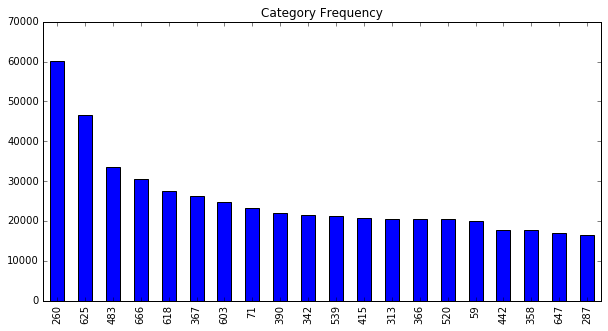

In [18]:
processed_df[
    processed_df.category_id.isin(top_cats)].category_id.astype('category').value_counts().plot(
                                                                                kind='bar'
                                                                                ,title='Category Frequency')

#### Top Category 

In [19]:
display(processed_df[processed_df.category_id==260].head())

,product_title,brand_id,category_id
3,Pelicans mousepad,44629,260
21,Desert Vegetation Clouds Before A Rain Placemat Pads Customized Made To Order Support Ready 15 6/8 Inch 400mm X 11 13/16 Inch 300mm X 1/8 Inch 3mm High Quality Eco Friendly Cloth With Neoprene Rubber Liil Place Mouse Pad Desktop Mousepad Laptop Mousepads Comfortable Table Desk Kitchen Computer Mouse Mat Cute Gaming Mouse_Pad,4869,260
22,3001 Katsushika Oi - Night Scene in the Yoshiwara ukiyo-e mouse pad MADE IN JAPAN,41186,260
55,"""Mousepad - 9.25"""" x 7.75"""" Designer Mouse Pads - Dog/Dogs MPDO-047""",44485,260
71,DLLM Creative Design Art Gaming Computer Mouse Pad Mat - DMArt884,24179,260


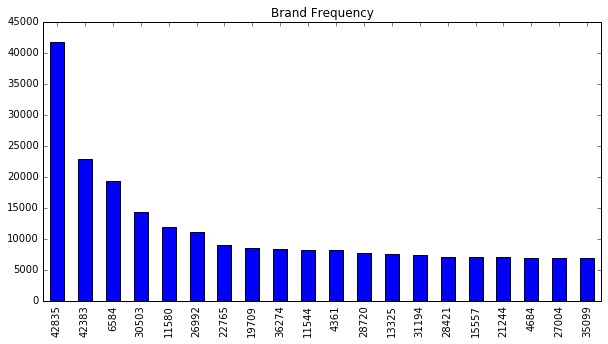

In [20]:
processed_df[
    processed_df.brand_id.isin(top_brands)].brand_id.astype('category').value_counts().plot(
                                                                                kind='bar'
                                                                                ,title='Brand Frequency')

#### Top Brands

In [25]:
display(processed_df[processed_df.brand_id==42835].head())

,product_title,brand_id,category_id
4,P4648-60029 Hewlett-Packard Tc2100 System Board,42835,68
35,"Sparepart: HP PEN, SHIPMENT, SINGLE, C5956-67785",42835,128
41,Hewlett Packard HP scanjet 8270 document flatbed 4800x4800 DPI 48-bit 25ppm 50-sheets USB L1975A#B1H,42835,183
53,D2920-69001 Hewlett-Packard 1Gb Fast Scsi-2 Hard Drive,42835,366
63,J6042A HP Jetdirect 250M LIO Print Server J6042A,42835,197


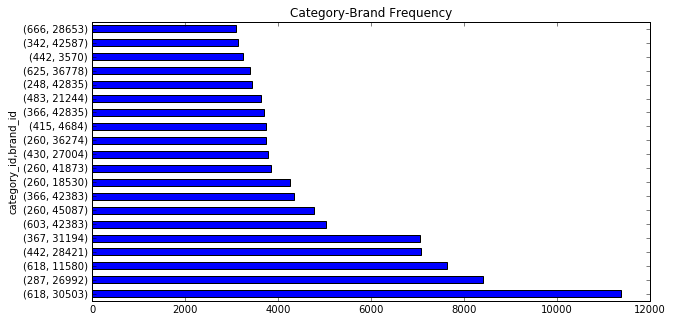

In [22]:
processed_df.groupby(['category_id','brand_id']).size().sort_values(ascending=False).head(top_n).plot(
                                                                                kind='barh'
                                                                                ,title='Category-Brand Frequency')

### Brand-Category Scatter

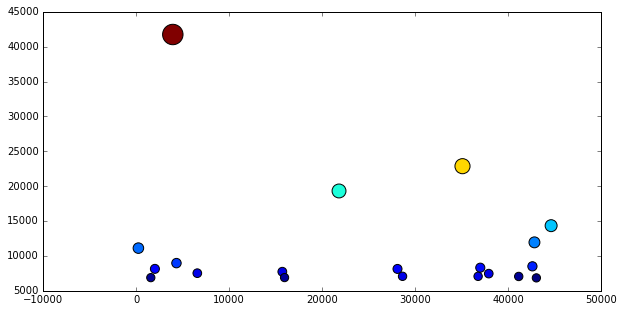

In [23]:
counts = processed_df.brand_id.astype('category').value_counts().tolist()
cat_counts = processed_df.category_id.astype('category').value_counts().tolist()
plt.scatter(processed_df.brand_id.unique().tolist()[0:top_n],
                           counts[0:top_n],
                           c=np.array(cat_counts[0:top_n])/1000,
                           s=np.array(counts[0:top_n])/100)

#### Top Combination

In [24]:
display(processed_df[(processed_df.category_id==618) & (processed_df.brand_id==42835)].head())

,product_title,brand_id,category_id
35131,HP Enterprise Mainstream Flash Media Kit - Flash memory card - 32 GB - Class 10 - microSD - for Pr *,42835,618
64327,HP Red generic reduced height crtg,42835,618
93677,"Sparepart: HP HS_HM87 DSC 750M, 720233-001",42835,618
185601,HP - Card SDHC Micro 4GB Class 4 with Adapter,42835,618
488261,HP Micro SD 2-Adapters Kit 447832-001and 443494-001,42835,618


### Observations

From the visualizations::
* Brands follow a long tailed/skewed distribution
* Categories also follow a skewed distribution
* Top Brands have products under top categories
* Computer/electronic products are listed under top most categories/brands

### Next Steps
* Utilize the learnings from EDA
* Use a similar preprocessing to load both train and test datasets
* Analyse and process ```product_title``` text
* Convert ```product_title``` into features/vectorize
* Begin modeling process